In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

implication of what i learn from tutorial: https://www.youtube.com/watch?v=wQ8BIBpya2k

In [2]:
import tensorflow as tf

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
print(tf.__version__)

1.14.0


In [4]:
mnist = tf.keras.datasets.mnist


In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
import matplotlib.pyplot as plt

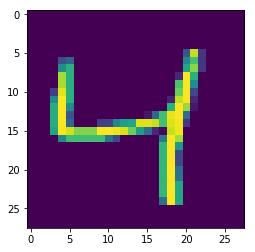

In [7]:
#how it looks like
plt.imshow(x_train[2])

In [8]:
#normalization is needed in some cases, so it is better to do it now too
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

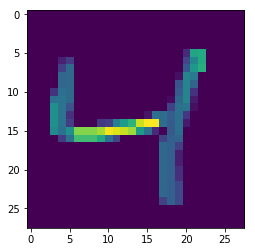

In [9]:
plt.imshow(x_train[2]) #values are between 0 and 1 now

In [10]:
classifier = tf.keras.models.Sequential() #creating the model

In [11]:
classifier.add(tf.keras.layers.Flatten())

In [12]:
classifier.add(tf.keras.layers.Dense(8, activation=tf.nn.relu))#adding layer 1

In [13]:
classifier.add(tf.keras.layers.Dense(8, activation=tf.nn.relu))#adding layer 2

In [14]:
classifier.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))#output layer

In [15]:
classifier.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #compile with basic settings

In [16]:
#now the model is ready
classifier.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 47us/sample - loss: 0.7310 - acc: 0.7714
Epoch 2/3
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3897 - acc: 0.8878
Epoch 3/3
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3571 - acc: 0.8961


not a very good model now, but it is just to learn

In [17]:
val_loss, val_acc = classifier.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3430 - acc: 0.9054
0.3430294708251953
0.9054


In [18]:
prediction=classifier.predict(x_test)

In [19]:
prediction[0]

array([2.0265579e-06, 1.1920929e-07, 4.4703484e-07, 1.0073185e-05,
       0.0000000e+00, 2.0861626e-07, 0.0000000e+00, 1.6853660e-02,
       4.4703484e-07, 9.6797943e-05], dtype=float32)

In [20]:
np.argmax(prediction[5])

1

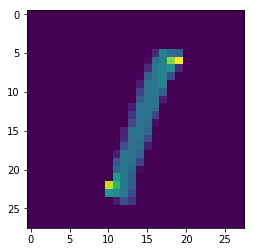

In [21]:
plt.imshow(x_test[5])

It looks like working!